In [1]:
# Author : Gaurab Dutta
# Email : gaurabdutta8@gmail.com
# Project : Health Insurance Lead Prediction

## Importing Libraries

In [2]:
# Load jupyter browser notification extension
%load_ext jupyternotify
# %reload_ext jupyternotify
# %%notify

<IPython.core.display.Javascript object>

In [3]:
# Importing basic labraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# sklearn modules
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, recall_score, precision_score, plot_confusion_matrix

In [5]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [6]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing DataSet

In [ ]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Health Insurance Lead Prediction

26-02-2021  09:15    <DIR>          .
26-02-2021  09:15    <DIR>          ..
26-02-2021  09:11    <DIR>          .ipynb_checkpoints
26-02-2021  09:07           174,452 sample_submission.csv
26-02-2021  09:07         1,268,506 test.csv
26-02-2021  09:07         3,049,673 train.csv
26-02-2021  09:15             2,095 Untitled.ipynb
               4 File(s)      4,494,726 bytes
               3 Dir(s)  175,785,435,136 bytes free


In [7]:
train_data = pd.read_csv('train.csv')
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


## Understanding the data

In [ ]:
train_data.shape
test_data.shape

(50882, 14)

(21805, 13)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
train_data.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [ ]:
train_data.columns[train_data.dtypes == object]

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [ ]:
train_data.describe()
train_data.describe(include=['O'])

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


## Handling Null values & cleaning the data

In [ ]:
train_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
train_data[train_data.columns[train_data.isnull().sum()!=0]].isnull().sum().count()

3

In [ ]:
train_data['Health Indicator'].unique()
train_data['Holding_Policy_Duration'].unique()
train_data['Holding_Policy_Type'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

array([ 3., nan,  1.,  4.,  2.])

<AxesSubplot:>

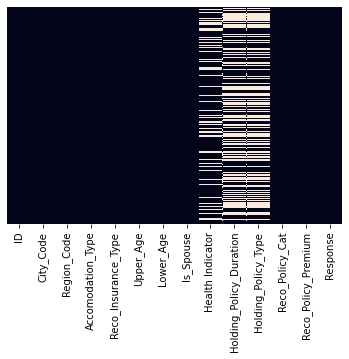

In [ ]:
# plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:>

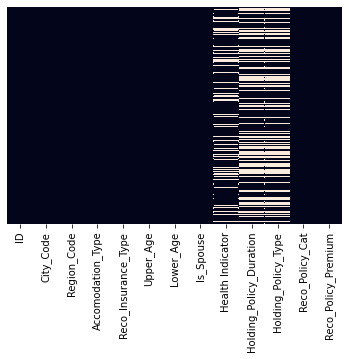

In [ ]:
# plt.figure(figsize=(10,6))
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
train_data['Health Indicator'].mode()
train_data['Holding_Policy_Duration'].mode()
train_data['Holding_Policy_Type'].mean()
train_data['Holding_Policy_Type'].median()

0    X1
dtype: object

0    1.0
dtype: object

2.4392282328360158

3.0

In [9]:
# Dropping the ID column.
train_df = train_data.drop(['ID'], axis=1)
test_df = test_data.drop(['ID'], axis=1)

In [10]:
# Filling the null values in 'Health Indicator' column with the mode.
train_df['Health Indicator'] = train_df['Health Indicator'].fillna(train_df['Health Indicator'].mode()[0])
test_df['Health Indicator'] = test_df['Health Indicator'].fillna(test_df['Health Indicator'].mode()[0])

In [11]:
# Filling the null values in 'Holding_Policy_Duration' column with the mode.
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].fillna(train_df['Holding_Policy_Duration'].mode()[0])
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].fillna(test_df['Holding_Policy_Duration'].mode()[0])

In [12]:
# Filling the null values in 'Holding_Policy_Duration' column with the median.
train_df['Holding_Policy_Type'] = train_df['Holding_Policy_Type'].fillna(train_df['Holding_Policy_Type'].median())
test_df['Holding_Policy_Type'] = test_df['Holding_Policy_Type'].fillna(test_df['Holding_Policy_Type'].median())

<AxesSubplot:>

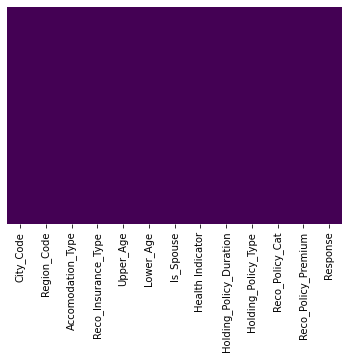

In [ ]:
# checking for null values
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
train_df.describe()
train_data.describe(include = ['O'])

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.662415,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,0.841994,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


## Checking for duplicates

In [ ]:
train_df[train_df.duplicated()]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response


In [ ]:
train_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

## Correlation Check

In [ ]:
train_df.corr()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,1.000000,-0.005649,-0.005928,0.009348,-0.065120,-0.010797,0.001121
Upper_Age,-0.005649,1.000000,0.921392,0.002579,0.025257,0.792689,0.002772
Lower_Age,-0.005928,0.921392,1.000000,-0.001842,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.009348,0.002579,-0.001842,1.000000,0.053760,0.012266,0.006208
Reco_Policy_Cat,-0.065120,0.025257,0.021163,0.053760,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.010797,0.792689,0.615739,0.012266,0.060989,1.000000,0.007943
Response,0.001121,0.002772,-0.002099,0.006208,0.114321,0.007943,1.000000


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

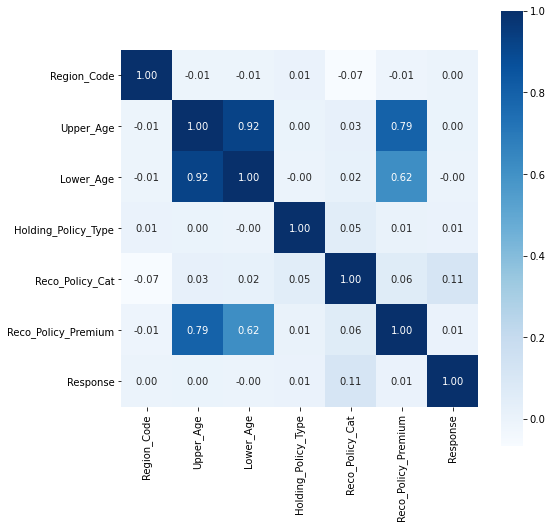

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train_df.corr(), xticklabels=train_df.corr().columns, yticklabels=train_df.corr().columns, square=True, annot=True, fmt='0.2f', cmap='Blues')

As it is evident from the above correlation plot that upper age & lower age are highly correlated, we can take the average of both into a single column thus reducing the dimensionality.

In [13]:
# Taking the average of age
train_df.insert(6, 'Age', [round((train_df['Upper_Age'][i] + train_df['Lower_Age'][i])/2) for i in train_df.index])
train_df.drop(columns=['Upper_Age', 'Lower_Age'], axis=1, inplace=True)
train_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,48,No,X2,1.0,3.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,No,X1,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,50,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,No,X2,3.0,1.0,16,10404.0,0


In [14]:
# Same for test data
test_df.insert(6, 'Age', [round((test_df['Upper_Age'][i] + test_df['Lower_Age'][i])/2) for i in test_df.index])
test_df.drop(columns=['Upper_Age', 'Lower_Age'], axis=1, inplace=True)

## Exploratory Data Analysis

In [15]:
# creating a copy of the dataframe
eda = train_df.copy()

In [ ]:
eda.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,48,No,X2,1.0,3.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,No,X1,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,50,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,No,X2,3.0,1.0,16,10404.0,0


0    38673
1    12209
Name: Response, dtype: int64


<AxesSubplot:xlabel='Response', ylabel='count'>

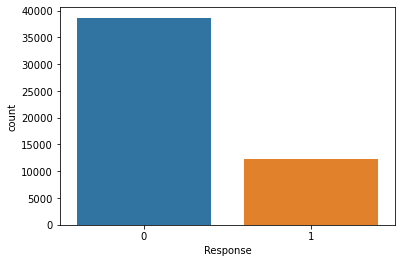

In [ ]:
print(eda.Response.value_counts())
sns.countplot(x="Response", data=eda)

In [76]:
eda['Response'][eda['Response'] == 1].count()
eda['Response'][eda['Response'] == 0].count()

12209

38673

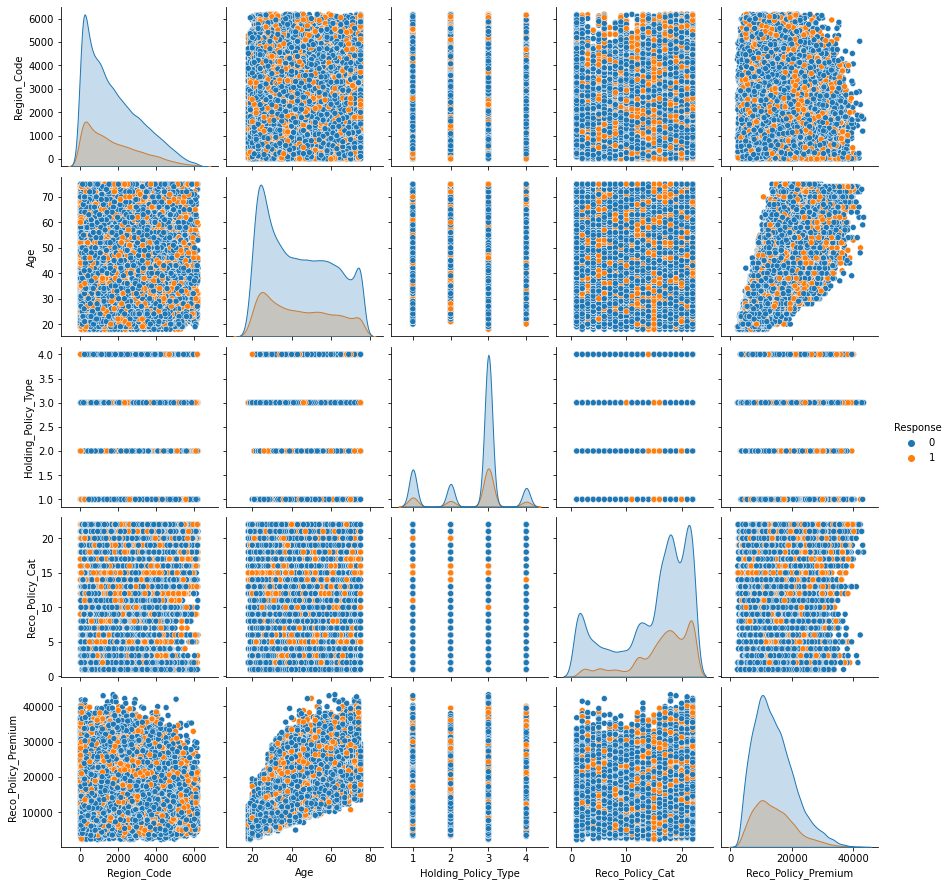

<IPython.core.display.Javascript object>

In [41]:
%%notify
sns.pairplot(eda, hue='Response')

Age and Reco_Policy_Premium have some relationship.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Percent Distribution of city code by response')

<AxesSubplot:title={'center':'Percent Distribution of city code by response'}, xlabel='City_Code', ylabel='percentage'>

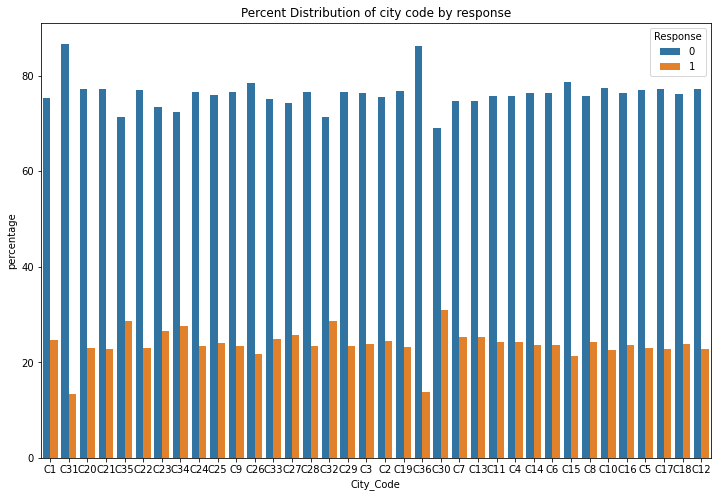

In [ ]:
response_count = (eda.groupby(['City_Code'])['Response']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('Response')
                 )
# print(response_count)
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of city code by response')
sns.barplot(x="City_Code", y="percentage", hue="Response", data=response_count)

We can see that city code C31 & C36 has a very low positive response whereas C30, C32, C34, C35 have a slight higher positive response rate compared to others.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Percent Distribution of Health Indicator by response')

<AxesSubplot:title={'center':'Percent Distribution of Health Indicator by response'}, xlabel='Health Indicator', ylabel='percentage'>

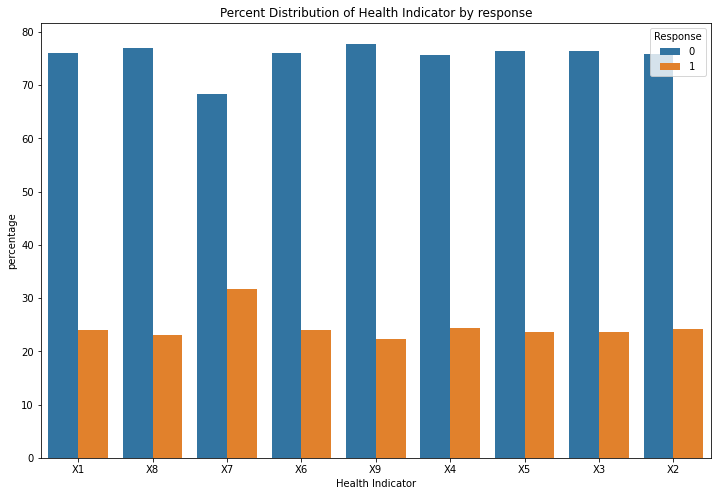

In [ ]:
response_count = (eda.groupby(['Health Indicator'])['Response']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('Response')
                 )
# print(response_count)
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of Health Indicator by response')
sns.barplot(x="Health Indicator", y="percentage", hue="Response", data=response_count)

The response rate for all the health indicators are nearly same except for X7, where the positive response comparatively higher then others.

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

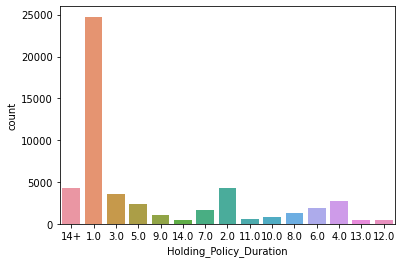

In [51]:
sns.countplot(x="Holding_Policy_Duration", data=eda)

Around 50% of the data has policy duration 1year and all other durations comprises of the rest 50% of the data.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Percent Distribution of Holding Policy Duration by response')

<AxesSubplot:title={'center':'Percent Distribution of Holding Policy Duration by response'}, xlabel='Holding_Policy_Duration', ylabel='percentage'>

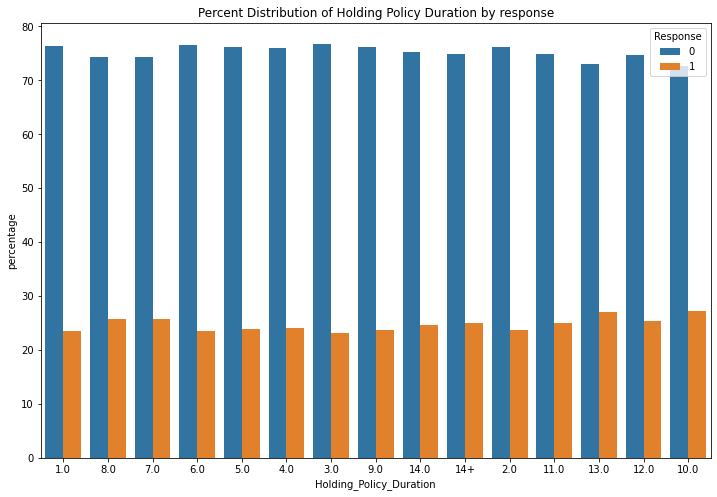

In [ ]:
response_count = (eda.groupby(['Holding_Policy_Duration'])['Response']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('Response')
                 )
# print(response_count)
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of Holding Policy Duration by response')
sns.barplot(x="Holding_Policy_Duration", y="percentage", hue="Response", data=response_count)

Holding Policy Duration has not much of an impact in the response rate as it is nearly similar over all duration periods.

## Handling Categorical Features

In [ ]:
train_df[train_df.columns[train_df.dtypes == object]].nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [ ]:
test_df[test_df.columns[test_df.dtypes == object]].nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [16]:
# Label encoding the categorical variables with two unique values
le = LabelEncoder()
df = train_df.copy()
df['Accomodation_Type'] = le.fit_transform(df['Accomodation_Type'])
df['Reco_Insurance_Type'] = le.fit_transform(df['Reco_Insurance_Type'])
df['Is_Spouse'] = le.fit_transform(df['Is_Spouse'])

In [17]:
# Converting categorical variables for test dataset also.
test_df['Accomodation_Type'] = test_df['Accomodation_Type'].map({'Rented':1, 'Owned':0})
test_df['Reco_Insurance_Type'] = test_df['Reco_Insurance_Type'].map({'Joint':1, 'Individual':0})
test_df['Is_Spouse'] = test_df['Is_Spouse'].map({'Yes':1, 'No':0})

In [ ]:
train_df[train_df.Holding_Policy_Duration == '14+'].shape[0]

4335

In [ ]:
train_df['City_Code'].unique()
train_df['Health Indicator'].unique()
train_df['Holding_Policy_Duration'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

array(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'], dtype=object)

array(['14+', '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0', '11.0',
       '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [18]:
df = df.rename(columns={"Health Indicator": "Health_Indicator"})
test_df = test_df.rename(columns={"Health Indicator": "Health_Indicator"})

In [19]:
# Assigning 14+ policy duration as 16 to make the column numerical
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(to_replace='14+', value=16.0)
df.Holding_Policy_Duration = pd.to_numeric(df.Holding_Policy_Duration)

test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].replace(to_replace='14+', value=16.0)
test_df.Holding_Policy_Duration = pd.to_numeric(test_df.Holding_Policy_Duration)

In [71]:
df['Holding_Policy_Duration'].dtype

dtype('float64')

In [20]:
# Converting City_Code & Health_Indicator columns into numerical values.
for i in range(len(df.City_Code)):
    df.City_Code[i] = int(''.join([j for j in df.City_Code[i] if j != 'C']))
df.City_Code = pd.to_numeric(df.City_Code)

for i in range(len(df.Health_Indicator)):
    df.Health_Indicator[i] = int(''.join([j for j in df.Health_Indicator[i] if j != 'X']))
df.Health_Indicator = pd.to_numeric(df.Health_Indicator)

In [21]:
# Applying same changes to the test dataset
for i in range(len(test_df.City_Code)):
    test_df.City_Code[i] = int(''.join([j for j in test_df.City_Code[i] if j != 'C']))
test_df.City_Code = pd.to_numeric(test_df.City_Code)

for i in range(len(test_df.Health_Indicator)):
    test_df.Health_Indicator[i] = int(''.join([j for j in test_df.Health_Indicator[i] if j != 'X']))
test_df.Health_Indicator = pd.to_numeric(test_df.Health_Indicator)

In [22]:
df.columns[df.dtypes == object]

Index([], dtype='object')

In [30]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(int)
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype(int)
df['Reco_Policy_Premium'] = df['Reco_Policy_Premium'].astype(int)

In [ ]:
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].astype(int)
test_df['Holding_Policy_Type'] = test_df['Holding_Policy_Type'].astype(int)
test_df['Reco_Policy_Premium'] = test_df['Reco_Policy_Premium'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   City_Code                50882 non-null  int64
 1   Region_Code              50882 non-null  int64
 2   Accomodation_Type        50882 non-null  int32
 3   Reco_Insurance_Type      50882 non-null  int32
 4   Age                      50882 non-null  int64
 5   Is_Spouse                50882 non-null  int32
 6   Health_Indicator         50882 non-null  int64
 7   Holding_Policy_Duration  50882 non-null  int32
 8   Holding_Policy_Type      50882 non-null  int32
 9   Reco_Policy_Cat          50882 non-null  int64
 10  Reco_Policy_Premium      50882 non-null  int32
 11  Response                 50882 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 3.5 MB


In [22]:
df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3,3213,1,0,36,0,1,16.0,3.0,22,11628.0,0
1,5,1117,0,1,48,0,2,1.0,3.0,22,30510.0,0
2,5,3732,0,0,32,0,1,1.0,1.0,19,7450.0,1
3,24,4378,0,1,50,0,1,16.0,3.0,19,17780.0,0
4,8,2190,1,0,44,0,2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,4,845,1,0,22,0,3,1.0,3.0,18,7704.0,0
50878,5,4188,1,0,27,0,3,7.0,3.0,4,5408.0,0
50879,1,442,1,0,63,0,2,16.0,1.0,12,11374.0,0
50880,1,4,0,1,60,0,2,2.0,2.0,16,28179.2,1


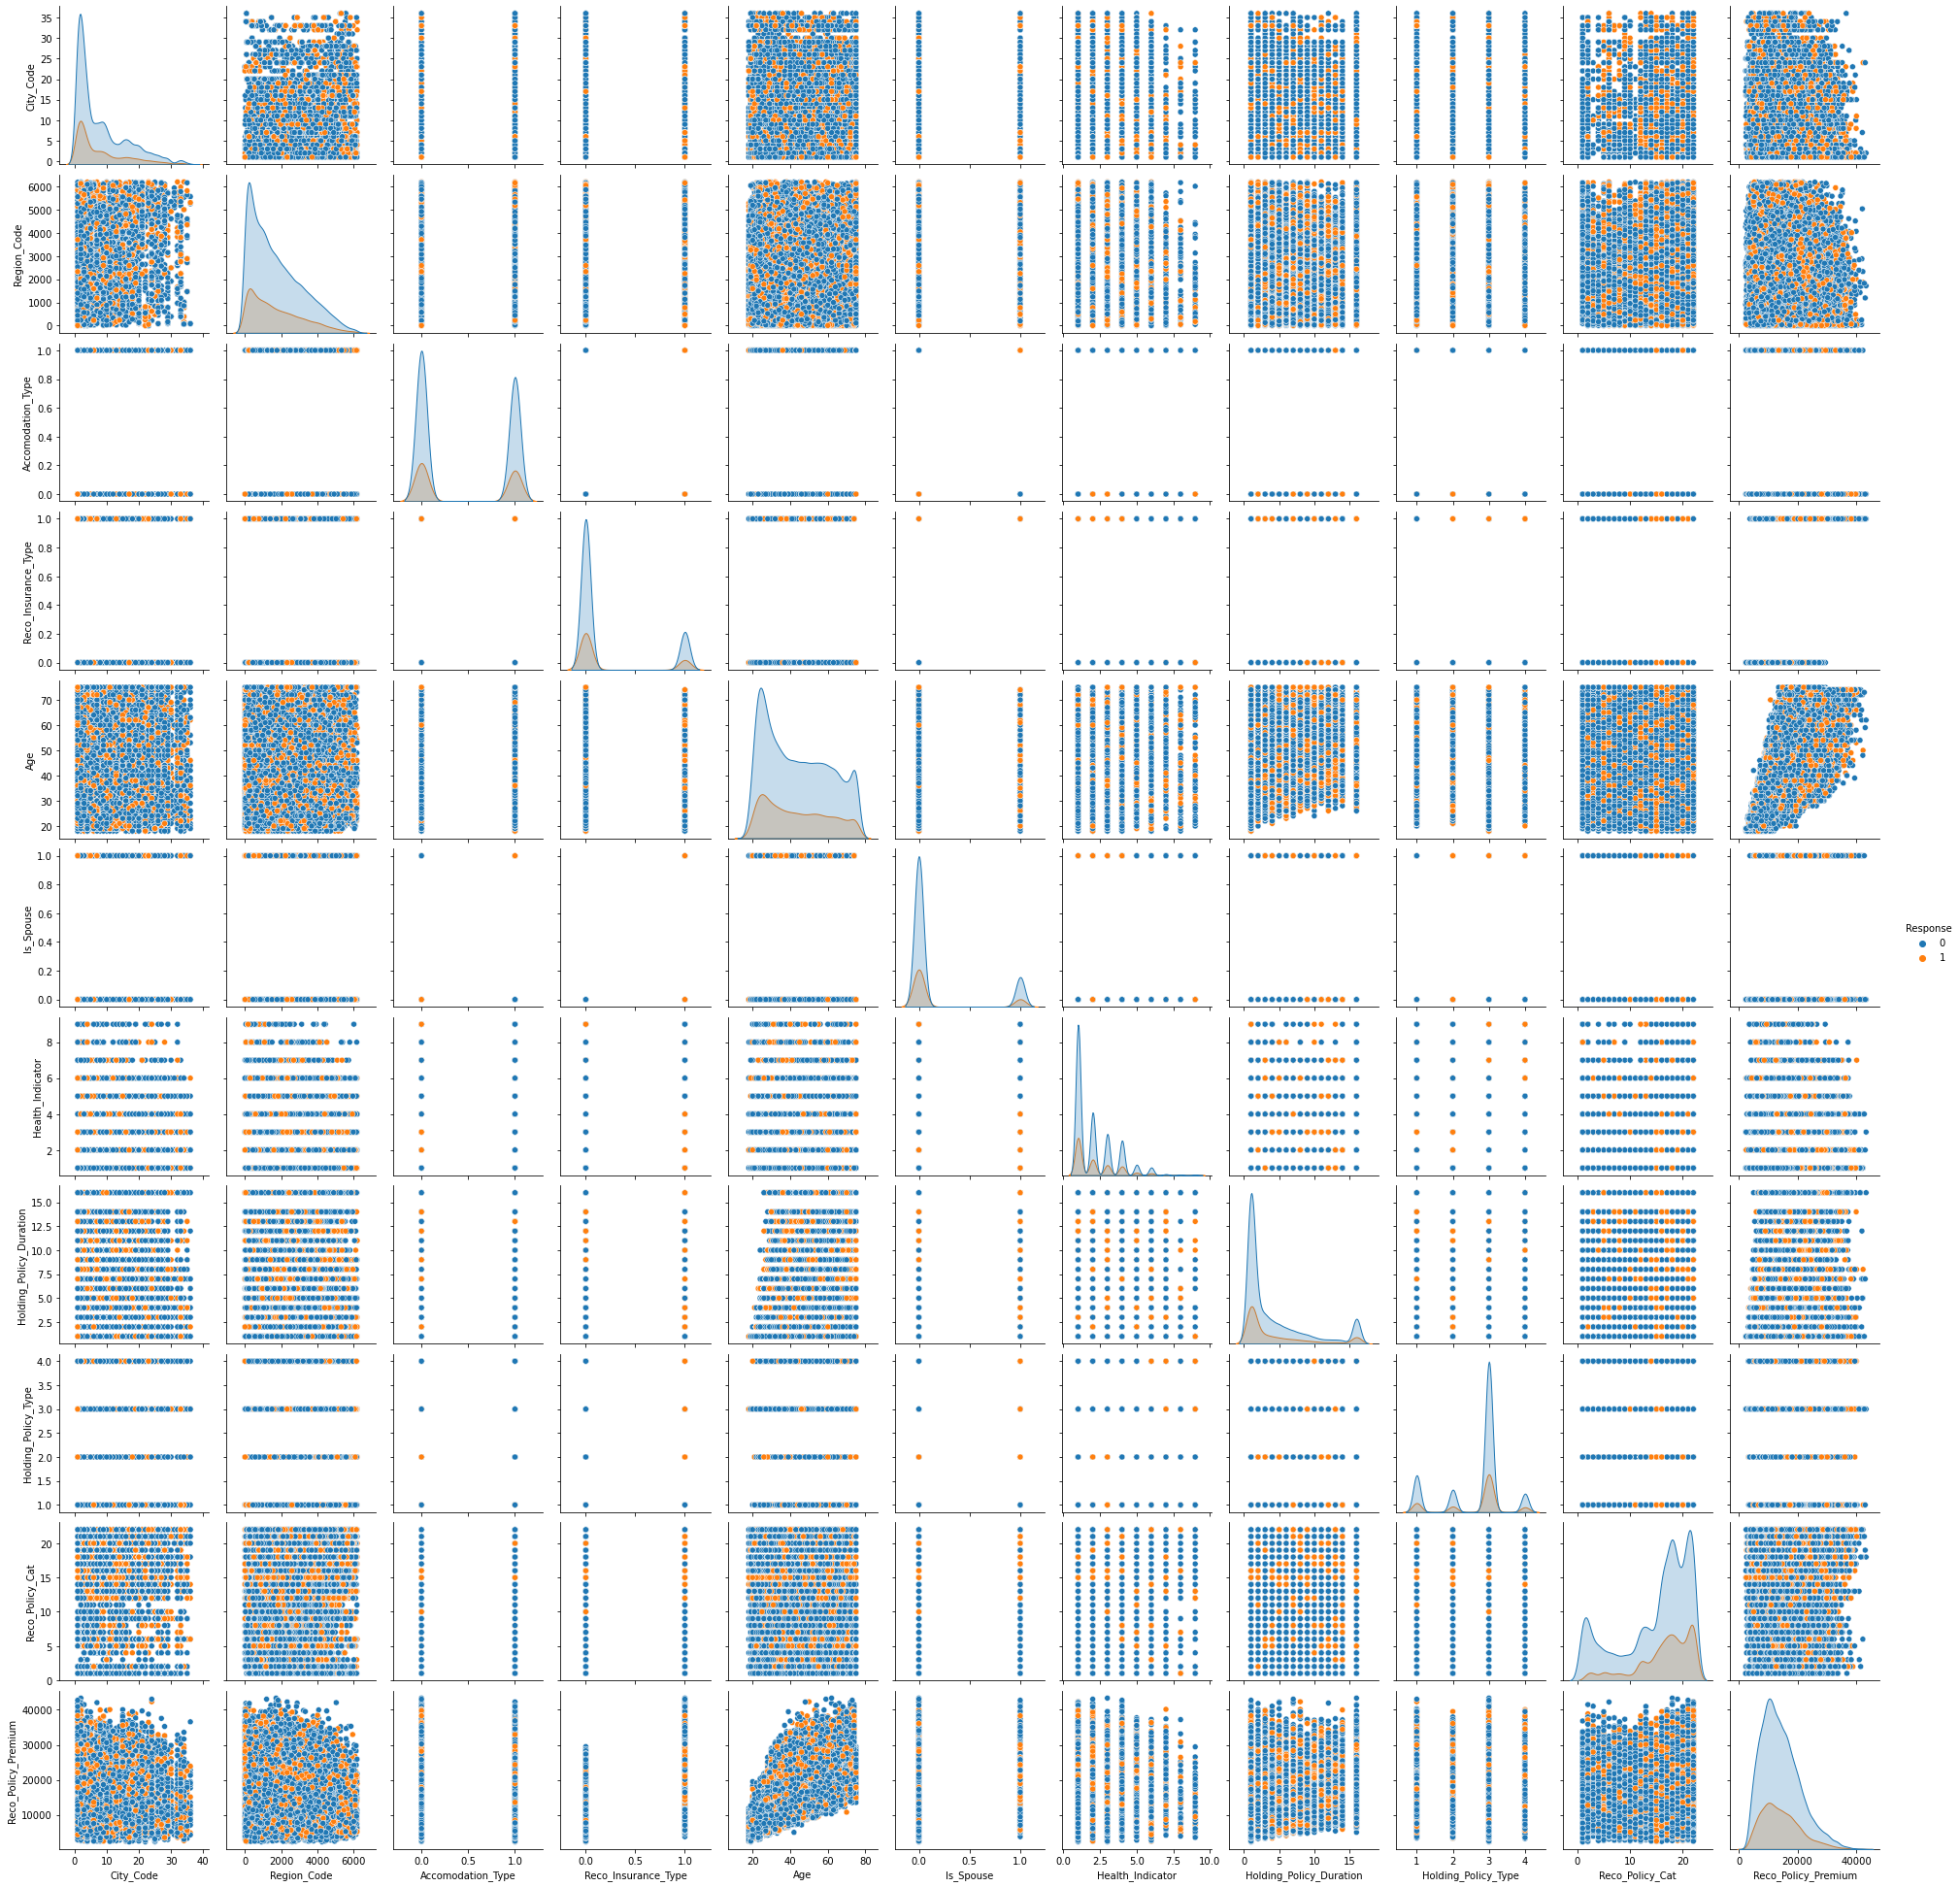

<IPython.core.display.Javascript object>

In [42]:
%%notify
sns.pairplot(df, hue='Response')

## Zero Variance Check

In [86]:
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(df)

VarianceThreshold()

In [87]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [88]:
df.columns[var_thres.get_support() == False]

Index([], dtype='object')

In [23]:
x = df.drop(['Response'],axis =1)
y = df['Response']

## Standardization

In [24]:
scaler = StandardScaler()

In [25]:
x = scaler.fit_transform(x)

In [26]:
scaled_df = pd.DataFrame(x, columns=df.columns[:-1])
scaled_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,-0.651863,1.039425,1.104046,-0.505203,-0.459480,-0.445367,-0.791349,2.521510,0.400939,1.085830,-0.387852
1,-0.398228,-0.432415,-0.905759,1.979403,0.247604,-0.445367,-0.080185,-0.680970,0.400939,1.085830,2.477394
2,-0.398228,1.403874,-0.905759,-0.505203,-0.695174,-0.445367,-0.791349,-0.680970,-1.974398,0.612688,-1.021842
3,2.011303,1.857504,-0.905759,1.979403,0.365451,-0.445367,-0.791349,2.521510,0.400939,0.612688,0.545682
4,-0.017776,0.321060,1.104046,-0.505203,0.011909,-0.445367,-0.080185,-0.253973,-1.974398,0.139547,-0.573588


In [31]:
abs(scaled_df.describe())

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04
mean,2.865858e-15,4.473010e-17,1.503678e-15,2.375472e-15,1.224950e-17,1.609703e-15,2.376718e-16,1.038871e-15,8.753136e-17,6.770283e-17,2.002087e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,9.054976e-01,1.216086e+00,9.057593e-01,5.052028e-01,1.520105e+00,4.453666e-01,7.913486e-01,6.809703e-01,1.974398e+00,2.226160e+00,1.806363e+00
25%,7.786802e-01,8.495304e-01,9.057593e-01,5.052028e-01,9.308686e-01,4.453666e-01,7.913486e-01,6.809703e-01,7.867293e-01,4.913081e-01,7.490049e-01
50%,3.982279e-01,2.400088e-01,9.057593e-01,5.052028e-01,1.059379e-01,4.453666e-01,8.018451e-02,4.674716e-01,4.009390e-01,2.972608e-01,1.526477e-01
75%,6.163114e-01,6.560161e-01,1.104046e+00,5.052028e-01,8.368400e-01,4.453666e-01,6.309796e-01,3.865232e-01,4.009390e-01,7.704021e-01,5.936334e-01
max,3.533112e+00,3.132724e+00,1.104046e+00,1.979403e+00,1.838542e+00,2.245341e+00,4.897964e+00,2.521510e+00,1.588607e+00,1.085830e+00,4.425858e+00


## Split the data into Train-Test

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Finding the best model using Auto-ML

In [37]:
from lazypredict.Supervised import LazyRegressor

In [38]:
%%notify
lreg = LazyRegressor()
models, predictions = lreg.fit(x_train, x_test, y_train, y_test)
models

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [1:11:13<00:00, 99.38s/it]


,R-Squared,RMSE,Time Taken
Model,,,
LGBMRegressor,0.06,0.42,0.58
HistGradientBoostingRegressor,0.06,0.42,2.31
XGBRegressor,0.05,0.42,3.39
GradientBoostingRegressor,0.05,0.42,6.83
RandomForestRegressor,0.04,0.42,20.12
LassoLarsCV,0.01,0.43,0.31
LassoCV,0.01,0.43,0.72
ElasticNetCV,0.01,0.43,0.56
LassoLarsIC,0.01,0.43,0.10


<IPython.core.display.Javascript object>

## Artificial Neural Network Implementation

In [65]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
%%notify
pip install tensorflow --user --no-warn-script-location

Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

In [1]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [33]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu'))

# Adding the third hidden layer
# classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, validation_split=0.20, batch_size = 10, epochs = 100)

Epoch 1/100
3257/3257 [==============================] - 7s 2ms/step - loss: 0.6599 - accuracy: 0.6832 - val_loss: 0.5407 - val_accuracy: 0.7653
Epoch 2/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5453 - accuracy: 0.7593 - val_loss: 0.5390 - val_accuracy: 0.7654
Epoch 3/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5476 - accuracy: 0.7560 - val_loss: 0.5383 - val_accuracy: 0.7655
Epoch 4/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5433 - accuracy: 0.7591 - val_loss: 0.5379 - val_accuracy: 0.7654
Epoch 5/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5405 - accuracy: 0.7626 - val_loss: 0.5374 - val_accuracy: 0.7653
Epoch 6/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5498 - accuracy: 0.7525 - val_loss: 0.5364 - val_accuracy: 0.7655
Epoch 7/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5416 - accuracy: 0.7602 - val_loss: 0.5356 - val_ac

3257/3257 [==============================] - 5s 2ms/step - loss: 0.5418 - accuracy: 0.7549 - val_loss: 0.5343 - val_accuracy: 0.7656
Epoch 58/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5343 - accuracy: 0.7616 - val_loss: 0.5341 - val_accuracy: 0.7656
Epoch 59/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5389 - accuracy: 0.7584 - val_loss: 0.5342 - val_accuracy: 0.7660
Epoch 60/100
3257/3257 [==============================] - 6s 2ms/step - loss: 0.5367 - accuracy: 0.7592 - val_loss: 0.5343 - val_accuracy: 0.7658
Epoch 61/100
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5363 - accuracy: 0.7606 - val_loss: 0.5349 - val_accuracy: 0.7654
Epoch 62/100
3257/3257 [==============================] - 6s 2ms/step - loss: 0.5368 - accuracy: 0.7600 - val_loss: 0.5346 - val_accuracy: 0.7654
Epoch 63/100
3257/3257 [==============================] - 6s 2ms/step - loss: 0.5407 - accuracy: 0.7560 - val_loss: 0.5341 - val_accuracy

In [35]:
pred = classifier.predict(test_df)

In [36]:
##Create Sample Submission file and Submit
pred_ann = pd.DataFrame(pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['ID'],pred_ann],axis=1)
datasets.columns = ['ID','Response']
datasets.to_csv('submission.csv',index=False)